# Regression Trees

##Agnieszka Noculak

In [1]:
import pandas as pd

In [2]:
melbourne_file_path = 'melb_data.csv'

In [3]:
melbourne_data = pd.read_csv(melbourne_file_path)

In [4]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
melbourne_data['Price'].mean()

1075684.079455081

In [6]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
melbourne_data = melbourne_data.dropna(axis=0) # Drop rows which contain missing values

##### Choosing of the parameter which should be determined

In [43]:
y = melbourne_data.Price

##### Choosing of the features

In [44]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [45]:
X = melbourne_data[melbourne_features]

In [46]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


##### Choosing of the model -> DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
melbourne_model = DecisionTreeRegressor(random_state=1)

In [49]:
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [50]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


##### Determination of the mean_absolute_error

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

##### The error is small, because we used the same data for learning and for validation. Data should be splitted ->Train_test_split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0) #what makes random_state??

In [55]:
melbourne_model = DecisionTreeRegressor()

In [56]:
melbourne_model.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [57]:
print('The precitions are:')
print(melbourne_model.predict(val_x))

The precitions are:
[ 900000.  550000. 1130000. ...  185000. 1075000. 1045000.]


In [58]:
val_predictions = melbourne_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

272880.4047772757


Obtained result is much larger than the previous one.

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mea(depth, train_x, train_y, val_x, val_y):
    melbourne_model = DecisionTreeRegressor(max_leaf_nodes = depth, random_state = 0)
    melbourne_model.fit(train_x,train_y)
    val_predictions = melbourne_model.predict(val_x)
    mea = mean_absolute_error(val_y,val_predictions)
    return(mea)

In [60]:
my_range = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]
my_mea = []
for i in my_range:
    mea = get_mea(i, train_x, train_y, val_x, val_y)
    my_mea.append(mea) ## ATTENTION! I can only use append for an empty list
    #print('Number of splits: '+ str(i) + ' Mean absolute error: ' + str(mea))

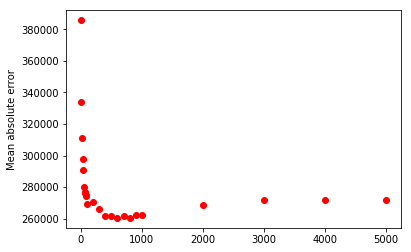

In [61]:
import matplotlib.pyplot as plt
plt.plot(my_range, my_mea, 'ro')
plt.ylabel('Mean absolute error')
plt.show()

The appropriate number of leaf_nodes is:

In [62]:
min_mea = min(my_mea)
index_no = my_mea.index(min_mea)
print(my_range[index_no])

800


More elegant code:

In [64]:
#candidate_max_leaf_nodes = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]
#scores = {leaf_size: get_mea(leaf_size, train_x, val_x, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
#best_tree_size = min(scores, key=scores.get)